TUBES DKA

Anggota :
- Falah Razan Hibrizi
- Fazari Razka Davira
- Irham Kurnia Putra

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_selected_heart_attack_export.csv")
df.head(10)

,Systolic blood pressure,Diastolic blood pressure,Result
0,160,83,0
1,98,46,1
2,160,77,0
3,120,55,1
4,112,65,0
5,112,58,0
6,179,68,0
7,214,82,1
8,154,81,0
9,160,95,0


In [3]:
def fuzzy_systolic(value):
    hasil = {"Rendah": 0, "Normal": 0, "Tinggi": 0}
    a, b, c, d = 90, 110, 140, 160

    if value <= a:
        hasil["Rendah"] = 1
    elif a < value < b:
        hasil["Rendah"] = (b - value) / (b - a)

    if a < value < b:
        hasil["Normal"] = (value - a) / (b - a)
    elif b <= value <= c:
        hasil["Normal"] = 1
    elif c < value < d:
        hasil["Normal"] = (d - value) / (d - c)

    if value >= d:
        hasil["Tinggi"] = 1
    elif c < value < d:
        hasil["Tinggi"] = (value - c) / (d - c)

    return hasil

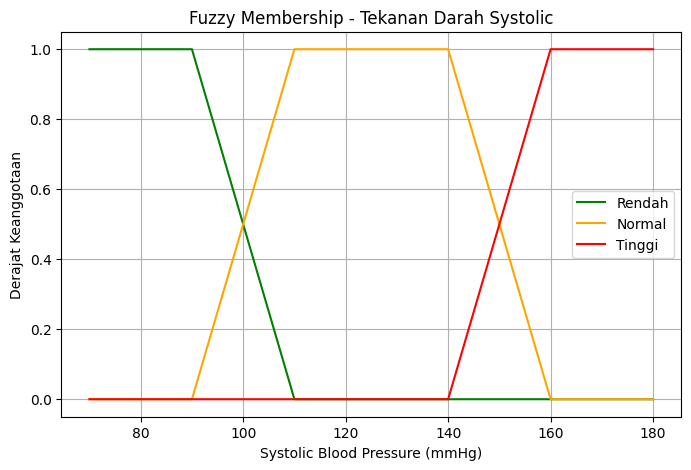

In [4]:
x_sys = [70, 90, 110, 140, 160, 180]

y_sys_low = [1, 1, 0, 0, 0, 0]
y_sys_normal = [0, 0, 1, 1, 0, 0]
y_sys_high = [0, 0, 0, 0, 1, 1]

plt.figure(figsize=(8,5))
plt.plot(x_sys, y_sys_low, label="Rendah", color="green")
plt.plot(x_sys, y_sys_normal, label="Normal", color="orange")
plt.plot(x_sys, y_sys_high, label="Tinggi", color="red")
plt.title("Fuzzy Membership - Tekanan Darah Systolic")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def fuzzy_diastolic(value):
    hasil = {"Rendah": 0, "Normal": 0, "Tinggi": 0}
    a, b, c, d = 60, 70, 85, 95

    if value <= a:
        hasil["Rendah"] = 1
    elif a < value < b:
        hasil["Rendah"] = (b - value) / (b - a)

    if a < value < b:
        hasil["Normal"] = (value - a) / (b - a)
    elif b <= value <= c:
        hasil["Normal"] = 1
    elif c < value < d:
        hasil["Normal"] = (d - value) / (d - c)

    if value >= d:
        hasil["Tinggi"] = 1
    elif c < value < d:
        hasil["Tinggi"] = (value - c) / (d - c)

    return hasil

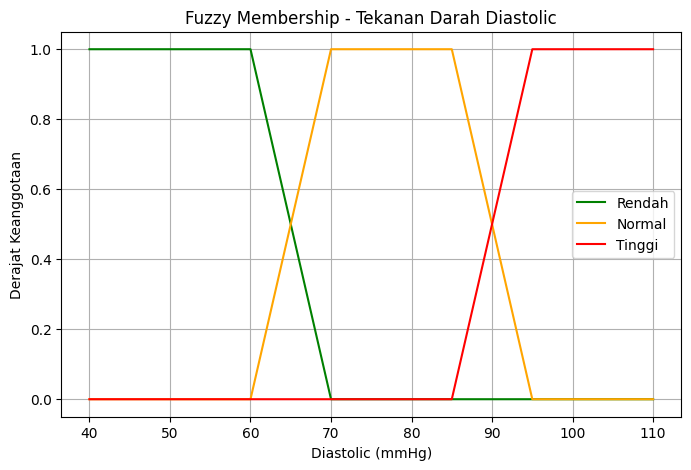

In [6]:
x = [40, 60, 70, 85, 95, 110]
y_rendah = [1, 1, 0, 0, 0, 0]
y_normal = [0, 0, 1, 1, 0, 0]
y_tinggi = [0, 0, 0, 0, 1, 1]

plt.figure(figsize=(8,5))
plt.title("Fuzzy Membership - Tekanan Darah Diastolic")
plt.plot(x, y_rendah, label="Rendah", color="green")
plt.plot(x, y_normal, label="Normal", color="orange")
plt.plot(x, y_tinggi, label="Tinggi", color="red")
plt.xlabel("Diastolic (mmHg)")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()
plt.show()

In [7]:
fuzzify = []

for sys, dia in zip(df['Systolic blood pressure'], df['Diastolic blood pressure']):
    fuzzy = {'Systolic': fuzzy_systolic(sys), 'Diastolic': fuzzy_diastolic(dia)}
    fuzzify.append(fuzzy)

# Print hasil top 10
print("Hasil Fuzzifikasi:\n")
for i in range(10):
    print(f"Data ke-{i+1}")
    print("Systolic :", fuzzify[i]['Systolic'])
    print("Diastolic:", fuzzify[i]['Diastolic'], end="\n\n")

Hasil Fuzzifikasi:

Data ke-1
Systolic : {'Rendah': 0, 'Normal': 0, 'Tinggi': 1}
Diastolic: {'Rendah': 0, 'Normal': 1, 'Tinggi': 0}

Data ke-2
Systolic : {'Rendah': 0.6, 'Normal': 0.4, 'Tinggi': 0}
Diastolic: {'Rendah': 1, 'Normal': 0, 'Tinggi': 0}

Data ke-3
Systolic : {'Rendah': 0, 'Normal': 0, 'Tinggi': 1}
Diastolic: {'Rendah': 0, 'Normal': 1, 'Tinggi': 0}

Data ke-4
Systolic : {'Rendah': 0, 'Normal': 1, 'Tinggi': 0}
Diastolic: {'Rendah': 1, 'Normal': 0, 'Tinggi': 0}

Data ke-5
Systolic : {'Rendah': 0, 'Normal': 1, 'Tinggi': 0}
Diastolic: {'Rendah': 0.5, 'Normal': 0.5, 'Tinggi': 0}

Data ke-6
Systolic : {'Rendah': 0, 'Normal': 1, 'Tinggi': 0}
Diastolic: {'Rendah': 1, 'Normal': 0, 'Tinggi': 0}

Data ke-7
Systolic : {'Rendah': 0, 'Normal': 0, 'Tinggi': 1}
Diastolic: {'Rendah': 0.2, 'Normal': 0.8, 'Tinggi': 0}

Data ke-8
Systolic : {'Rendah': 0, 'Normal': 0, 'Tinggi': 1}
Diastolic: {'Rendah': 0, 'Normal': 1, 'Tinggi': 0}

Data ke-9
Systolic : {'Rendah': 0, 'Normal': 0.3, 'Tinggi': 0.7}

In [8]:
fuzzy_rules = {
    ('Rendah', 'Rendah') : 'Resiko Rendah',
    ('Rendah', 'Normal') : 'Resiko Sedang',
    ('Rendah', 'Tinggi') : 'Resiko Tinggi',

    ('Normal', 'Rendah') : 'Resiko Sedang',
    ('Normal', 'Normal') : 'Resiko Sedang',
    ('Normal', 'Tinggi') : 'Tinggi',

    ('Tinggi', 'Rendah') : 'Resiko Tinggi',
    ('Tinggi', 'Normal') : 'Resiko Tinggi',
    ('Tinggi', 'Tinggi') : 'Resiko Tinggi',
}

In [10]:
def sugeno_inference(systolic, diastolic):
    rules = {
        ('Rendah', 'Rendah'): 0.2,
        ('Rendah', 'Normal'): 0.4,
        ('Rendah', 'Tinggi'): 0.6,
        ('Normal', 'Rendah'): 0.4,
        ('Normal', 'Normal'): 0.5,
        ('Normal', 'Tinggi'): 0.7,
        ('Tinggi', 'Rendah'): 0.6,
        ('Tinggi', 'Normal'): 0.8,
        ('Tinggi', 'Tinggi'): 1.0,
    }

    fuzzy_sys = fuzzy_systolic(systolic)
    fuzzy_dia = fuzzy_diastolic(diastolic)

    weighted_sum = 0
    total_weight = 0

    for cat_sys, val_sys in fuzzy_sys.items():
        for cat_dia, val_dia in fuzzy_dia.items():
            firing_strength = min(val_sys, val_dia)
            rule_output = rules.get((cat_sys, cat_dia), 0.0)
            weighted_sum += firing_strength * rule_output
            total_weight += firing_strength

    return weighted_sum / total_weight if total_weight > 0 else 0.0

In [11]:
sugeno_scores = []
for i in range(len(df)):
    score = sugeno_inference(df.loc[i, 'Systolic blood pressure'], df.loc[i, 'Diastolic blood pressure'])
    sugeno_scores.append(score)

df['Sugeno_Score'] = sugeno_scores

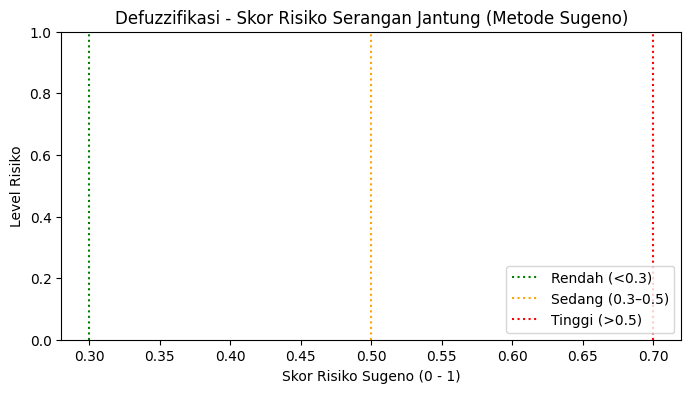

In [16]:
plt.figure(figsize=(8, 4))
plt.title("Defuzzifikasi - Skor Risiko Serangan Jantung (Metode Sugeno)")
plt.xlabel("Skor Risiko Sugeno (0 - 1)")
plt.ylabel("Level Risiko")

plt.vlines(0.3, 0, 1, linestyles="dotted", colors="green", label="Rendah (<0.3)")
plt.vlines(0.5, 0, 1, linestyles="dotted", colors="orange", label="Sedang (0.3–0.5)")
plt.vlines(0.7, 0, 1, linestyles="dotted", colors="red", label="Tinggi (>0.5)")
plt.legend(loc="lower right")

plt.ylim(0, 1)
plt.show()